# Sentiment Analysis of The Tweets regarding Farmer's Protest

### Importing Libraries

In [1]:
pwd

'c:\\Users\\rajne\\OneDrive\\Desktop\\ML_Twitter'

In [2]:
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import nltk
# nltk.download('words')
words = set(nltk.corpus.words.words())

### Twitter API credentials

In [31]:
class TwitterClient(object): 
    def __init__(self): 
        # Twitter API credentials
        consumer_key = 'HE9pwjf1g85QO9PlIGedNyg0k'
        consumer_secret = 'RITiKSR4pZZRGPVFKIq6nEdokh8D33WMTH0O8MckJWvYzP6bjN'
        access_token = '1353286031467040776-kmjCmVoQHPYaVHCPMixYToWUgLmOM1'
        access_token_secret = 'KYvwJwGFzjXUWWyokvcWWCBrhpRsqtzaO5oCbCYyUGfA7'
  
        # authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 

    #removing hashtags,emojis,stopwords
    def clean_txt(self,txt):
        
            txt=txt.encode("ascii","ignore")
            txt=txt.decode()
            txt=re.sub(r'@[A-Z0-9a-z:]+','',txt)#replace username-tags
            txt=re.sub(r'^[RT]+','',txt)#replace RT-tags
            txt = re.sub('https?://[A-Za-z0-9./]+','',txt)#replace URLs
            txt=re.sub("[^a-zA-Z]", " ",txt)#replace hashtags
            #removing punctuation,numbers and whitespace
            res=re.sub(r'[^\w\s]', '', txt.lower())
            res=re.sub('\s+',' ',res)
            return res

        
    def get_tweet_sentiment(self, tweet): 
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_txt(tweet)) 
        # setting sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
        
  
    def get_tweets(self,query): 
        # Function to fetch tweets and parse them. 
        # empty list to store parsed tweets 
  
        try: 
            # call twitter api to fetch tweets 
            # Define the search term and the date_since date as variables 
            tweets = [] 
            # Collect tweets 
            fetched_tweets = tweepy.Cursor(self.api.search,q=query,lang="en").items(100)
            
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text
                parsed_tweet['clean tweet'] = self.clean_txt(tweet.text) 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  

In [ ]:
import uuid

image_name = ""

In [34]:

    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # picking neutral tweets from tweets 
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 

    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % \ ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets))) 

    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:5]: 
        print(tweet['text']) 

    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:5]: 
        print(tweet['text']) 
        
    image_name = "img_{}.png".format(str(uuid.uuid4())) 
    

    from shutil import copyfile
    copyfile('templates/index.html','templates/copyindex.html')
    f = open('templates/copyindex.html','a', encoding='utf-8')

    f.write("<img src='{{ url_for('static', filename='images/%s') }}' alt='wordcloud' >" % (image_name))

    f.write("<h1 class='posHeading'>Recent Positive Tweets</h1>\n")
    f.write("<div class='pos'>\n")
    for tweet in ptweets[:10]: 
        f.write("<p>"+tweet['text']+"</p>\n")
    f.write("</div>\n")

    f.write("<h1 class='negHeading'>Recent Negative Tweets</h1>\n")
    f.write("<div class='neg'>\n")
    for tweet in ntweets[:10]: 
        f.write("<p>"+tweet['text']+"</p>\n") 
    f.write("</div>\n")

    f.write("<h1 class='neuHeading'>Recent Neutral Tweets</h1>\n")
    f.write("<div class='neu'>\n")
    for tweet in neutweets[:10]:
        f.write("<p>"+tweet['text']+"</p>\n") 
    f.write("</div>\n")
    f.write("""
           <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
           <script type="text/javascript">

          google.charts.load('current', {'packages':['corechart']});

          google.charts.setOnLoadCallback(drawCharts);


          function drawPie() {

            var data = new google.visualization.DataTable();
            data.addColumn('string', 'Sentiment');
            data.addColumn('number', 'Tweets');
            data.addRows([
              ['Positive', %s],
              ['Negative', %s],
            ]);

            var options = {'title':'Sentiment Analysis by Percentage',
                            is3D:true,
                           'colors':['#2D912D','#FF1919','#62B1FF'],
                           titleTextStyle: {color:'#47525C'},
                           'backgroundColor':'#C0DEED',
                           'width':500,
                           'height':300};

            var chart1 = new google.visualization.PieChart(document.getElementById('pieChart'));
            chart1.draw(data, options);
          }



          function drawBar() {

            var data = google.visualization.arrayToDataTable([
              ['Sentiment', 'Positive', 'Negative', 'Neutral'],
              ['Sentiments' ,%s, %s, %s]
            ]);

            var options = {
              animation: {
              duration: 1000,
              easing: 'out',
              startup: true
                       },
              title:'Sentiment Analysis by Count',
              titleTextStyle: {color:'#47525C'},
              hAxis: {minValue: 0}, 
              'backgroundColor':'#C0DEED',
              'colors':['#2D912D','#FF1919','#4169E1'],
              'width':500, 'height':300
            };

            var chart2 = new google.visualization.BarChart(document.getElementById('barChart'));
            chart2.draw(data, options);
          }

          function drawCharts() {
            drawPie();
            drawBar();
          }
        </script>""" % (len(ptweets),len(ntweets),len(ptweets),len(ntweets),len(neutweets)))
    f.write("</body></html>\n")
    f.close()

Positive tweets percentage: 57.142857142857146 %
Negative tweets percentage: 11.904761904761905 %
Neutral tweets percentage: 30.952380952380953 % \ 


Positive tweets:
Anish Giri Takes #TataSteelChess Lead With Incredible Endgame! https://t.co/PZMsDV9DdF via @YouTube
RT @ChessFansclub: Chess: Anish Giri aiming for rare victory at Wijk while Magnus Carlsen trails - The Guardian https://t.co/jIaY8i6YEf
RT @guardian: Chess: Anish Giri aiming for rare victory at Wijk while Magnus Carlsen trails https://t.co/KA0reM7IjF
Chess: Anish Giri aiming for rare victory at Wijk while Magnus Carlsen trails https://t.co/KA0reM7IjF
RT @guardiannews: Chess: Anish Giri aiming for rare victory at Wijk while Magnus Carlsen trails https://t.co/ahF7OdcR9w


Negative tweets:
The balance of the meetings between the players who meet in round 11 at #TataSteelChess :Two hours until Magnus Car… https://t.co/DyNWzWtyQe
RT @GrandChessTour: Fabiano Caruana and Anish Giri defeated Radek Wojtaszek and Maxime Vachier-Lag

In [35]:
len(tweets)

42

In [36]:
textTweet = []
cleanTweet = []
sentimentTweet = []
for i in range(0,len(tweets)):
    textTweet.append(tweets[i]['text'])
for i in range(0,len(tweets)):
    cleanTweet.append(tweets[i]['clean tweet']) 
for i in range(0,len(tweets)):
    sentimentTweet.append(tweets[i]['sentiment']) 

In [37]:
# Create a dataframe of collected tweets
df = pd.concat([pd.DataFrame(textTweet,columns=['tweet']),pd.DataFrame(cleanTweet,columns=['cleantweet'])], axis=1)
df = pd.concat([df,pd.DataFrame(sentimentTweet,columns=['sentiment'])], axis=1)

In [38]:
df.to_csv('tweets.csv')
df

,tweet,cleantweet,sentiment
0,Anish Giri Takes #TataSteelChess Lead With Inc...,anish giri takes tatasteelchess lead with incr...,positive
1,RT @ChessFansclub: Chess: Anish Giri aiming fo...,chess anish giri aiming for rare victory at w...,positive
2,RT @guardian: Chess: Anish Giri aiming for rar...,chess anish giri aiming for rare victory at w...,positive
3,RT @olimpiuurcan: After 21 moves against the w...,after moves against the world champion anish ...,neutral
4,Carlsen 1/2-1/2 Giri keeps Anish 1.5 points ah...,carlsen giri keeps anish points ahead of magnu...,neutral
5,Chess: Anish Giri aiming for rare victory at W...,chess anish giri aiming for rare victory at wi...,positive
6,RT @guardiannews: Chess: Anish Giri aiming for...,chess anish giri aiming for rare victory at w...,positive
7,Anish Giri will be the next no 1\n#chess,anish giri will be the next no chess,neutral
8,"After 21 moves against the world champion, Ani...",after moves against the world champion anish g...,neutral
9,Chess: Anish Giri aiming for rare victory at W...,chess anish giri aiming for rare victory at wi...,positive


## Data Analysis

In [39]:
import os
import glob

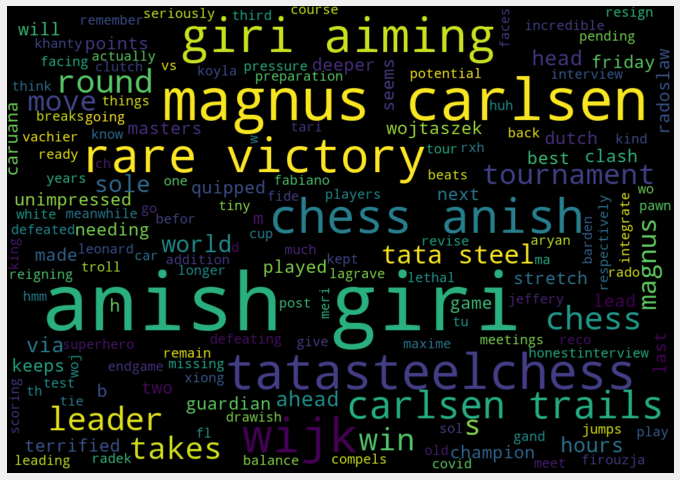

In [40]:
wcloud=' '.join([i for i in df['cleantweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=120).generate(wcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
if os.path.exists("static/images/img_*.png"):
      [os.remove(file) for file in glob.glob('static/images/img_*.png')]
        
plt.savefig('static/images/{}'.format(image_name), transparent = True, bbox_inches = 'tight')        
plt.show()

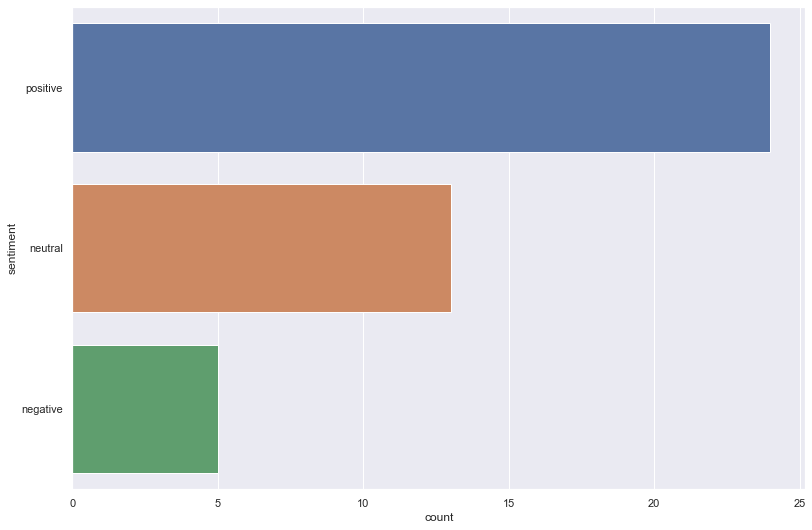

In [41]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(y=df['sentiment'])
plt.show()

 * Running on http://localhost:3000/ (Press CTRL+C to quit)
